In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pandas.plotting import register_matplotlib_converters

# Disable scientific notation for large numbers
pd.options.display.float_format = '{:.0f}'.format

# Setting display options for Pandas to show three decimal places for floating-point numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Data Loading

In [3]:
# import data
iris_df = pd.read_csv('/content/drive/MyDrive/Iris.csv')

# Data Exploration

In [4]:
iris_df.info()  # Display information about the DataFrame, including data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris_df.head()  # Display top 5 records

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.10,3.50,1.40,0.20,Iris-setosa
1,4.90,3.00,1.40,0.20,Iris-setosa
2,4.70,3.20,1.30,0.20,Iris-setosa
3,4.60,3.10,1.50,0.20,Iris-setosa
4,5.00,3.60,1.40,0.20,Iris-setosa


In [6]:
iris_df.describe()  # Display statistical info abour dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


# Data Cleaning

In [7]:
print(iris_df.isna().sum().sum()) # Print the sum of missing values

0


Since, the sum of missing values is zero, so there is no need to replace missing values.

In [8]:
print(iris_df.duplicated().sum()) # Print the sum of duplicated values

3


In [9]:
iris_df.drop_duplicates(inplace=True) # Drop duplicates

In [10]:
print(iris_df.duplicated().sum()) # Print the sum of duplicated values after dropping duplicates.

0


# Feature Engineering and Standardization

In [11]:
# Separate features and target
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = iris_df[features]
y = iris_df['Species']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
# Attach the target
principal_df['Species'] = iris_df['Species']

In [12]:
principal_df.head()

,PC1,PC2,Species
0,-2.29,0.49,Iris-setosa
1,-2.12,-0.67,Iris-setosa
2,-2.40,-0.33,Iris-setosa
3,-2.33,-0.59,Iris-setosa
4,-2.42,0.65,Iris-setosa


# Data Visualization

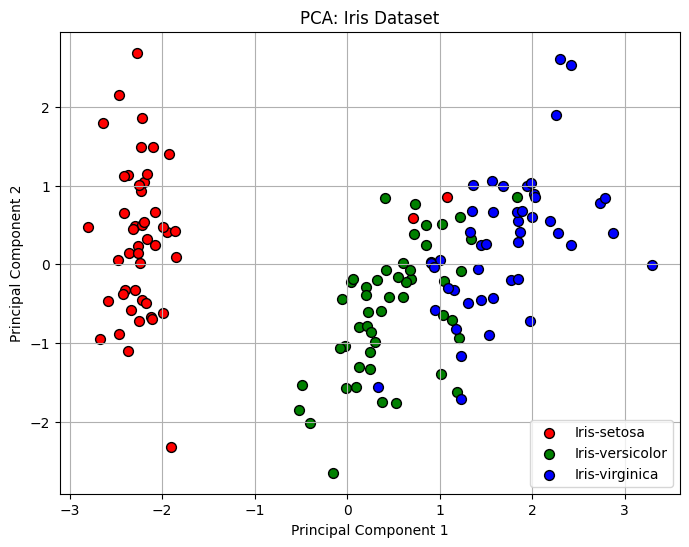

In [13]:
# Scatter plot
colors = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}
plt.figure(figsize=(8, 6))
for species, color in colors.items():
    idx = principal_df['Species'] == species
    plt.scatter(principal_df.loc[idx, 'PC1'], principal_df.loc[idx, 'PC2'],
                c=color, label=species, edgecolors='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()

**Task 2 : Stock Price Prediction Using Time Series
Forecasting**

# Data Loading

In [14]:
# import data
stock_prices_df = pd.read_csv('/content/drive/MyDrive/stock_prices.csv')

# Data Exploration

In [15]:
stock_prices_df.info()  # Display information about the DataFrame, including data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110253 non-null  float64
 4   Low        110253 non-null  float64
 5   Close      110253 non-null  float64
 6   Adj Close  110253 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.9+ MB


In [16]:
stock_prices_df.head()  # Display top 5 records

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.69,528.69,528.69,528.69,528.69,0.00
1,NYA,1966-01-03,527.21,527.21,527.21,527.21,527.21,0.00
2,NYA,1966-01-04,527.84,527.84,527.84,527.84,527.84,0.00
3,NYA,1966-01-05,531.12,531.12,531.12,531.12,531.12,0.00
4,NYA,1966-01-06,532.07,532.07,532.07,532.07,532.07,0.00


In [17]:
stock_prices_df.describe()  # Display statistical info abour dataset

,Open,High,Low,Close,Adj Close,Volume
count,110253.00,110253.00,110253.00,110253.00,110253.00,110253.00
mean,7658.52,7704.37,7608.00,7657.55,7657.35,1273975162.60
std,9011.48,9066.64,8954.51,9011.51,9011.61,4315783120.88
min,54.87,54.87,54.87,54.87,54.87,0.00
25%,1855.03,1864.51,1843.98,1855.06,1854.18,0.00
50%,5194.09,5226.28,5154.05,5194.75,5194.75,432900.00
75%,10134.30,10207.82,10060.35,10134.83,10134.83,173431400.00
max,68775.06,69403.75,68516.99,68775.06,68775.06,94403740000.00


# Data Cleaning

In [18]:
stock_prices_df.isna().sum()  # Print the sum of missing values

,0
Index,0
Date,0
Open,2204
High,2204
Low,2204
Close,2204
Adj Close,2204
Volume,2204


In [19]:
stock_prices_df.fillna(method='ffill', inplace=True) # Filling missing values by propagating the last valid observation forward to the next missing value.

/tmp/ipython-input-1425105089.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_prices_df.fillna(method='ffill', inplace=True)


In [20]:
stock_prices_df.isna().sum()  # Print the sum of missing values after replacing the missing values

,0
Index,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [21]:
print(stock_prices_df.duplicated().sum()) # Print the sum of duplicated values

0


Since, the sum of duplicated values, so there is no need to drop duplicates.

# Data Preprocessing

In [22]:
# Convert the 'Date' column to datetime format
stock_prices_df['Date'] = pd.to_datetime(stock_prices_df['Date'])

# Set 'Date' as the index
stock_prices_df.set_index('Date', inplace=True)

# Data Visualization

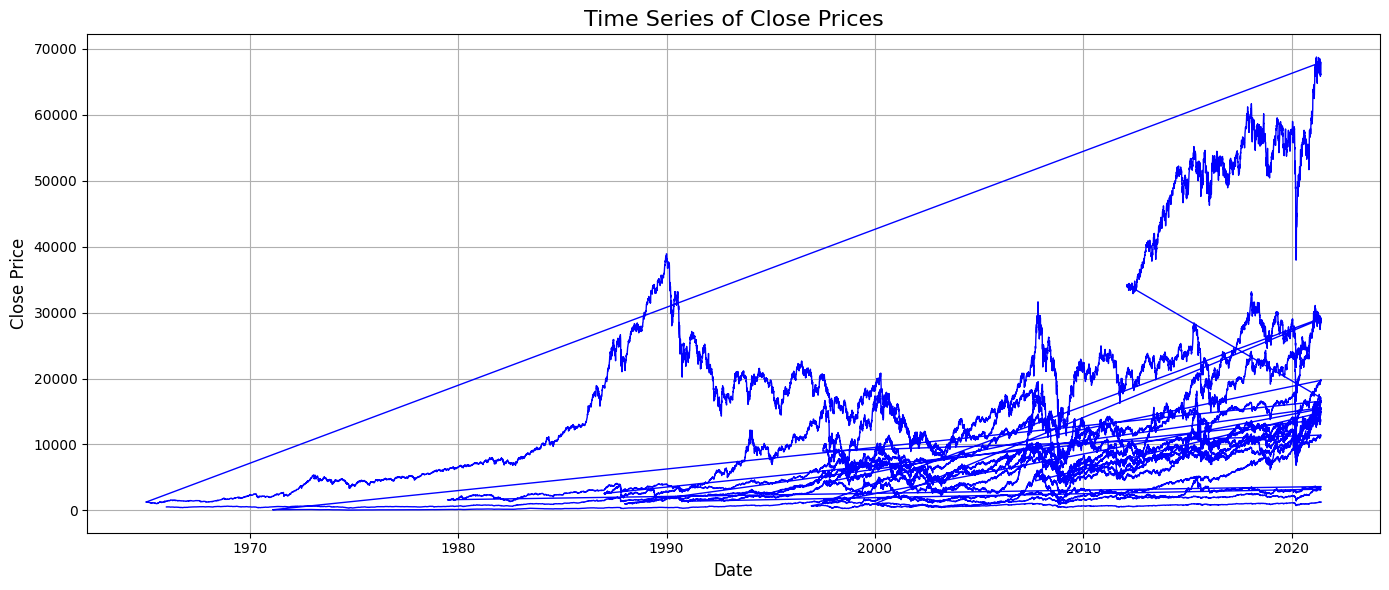

In [23]:
# Plot the time series of Close prices
plt.figure(figsize=(14, 6))
plt.plot(stock_prices_df['Close'], color='blue', linewidth=1)
plt.title('Time Series of Close Prices', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
# Drop missing values in the 'Close' column
stock_prices_df = stock_prices_df.dropna(subset=['Close'])

# Perform seasonal decomposition (assume ~252 trading days/year)
decomposition = seasonal_decompose(stock_prices_df['Close'], model='multiplicative', period=252)

<Figure size 1400x1000 with 0 Axes>

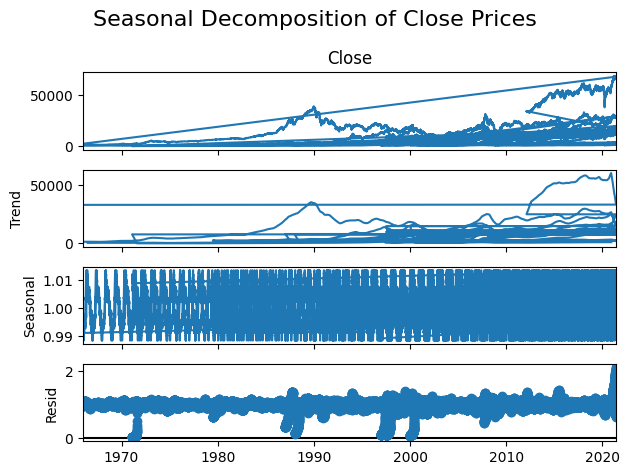

In [25]:
# Plot the observed, trend, seasonal, and residual components
plt.figure(figsize=(14, 10))
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Close Prices', fontsize=16)
plt.tight_layout()
plt.show()

# Feature Engineering

In [26]:
# Sort the DataFrame by date in ascending order
stock_prices_df.sort_index(inplace=True)

# Create lag feature: previous day's close price
stock_prices_df['Close_Lag1'] = stock_prices_df['Close'].shift(1)

In [27]:
# Display the top 5 rows with the new lag feature
print(stock_prices_df[['Close', 'Close_Lag1']].head())

             Close  Close_Lag1
Date                          
1965-01-05 1257.72         NaN
1965-01-06 1263.99     1257.72
1965-01-07 1274.27     1263.99
1965-01-08 1286.43     1274.27
1965-01-11 1286.43     1286.43


# Rolling window calculations

In [28]:
# Calculate rolling window metrics
stock_prices_df['MA_7'] = stock_prices_df['Close'].rolling(window=7).mean()     # 1-week moving average
stock_prices_df['MA_30'] = stock_prices_df['Close'].rolling(window=30).mean()   # 1-month moving average
stock_prices_df['STD_30'] = stock_prices_df['Close'].rolling(window=30).std()   # 30-day rolling standard deviation

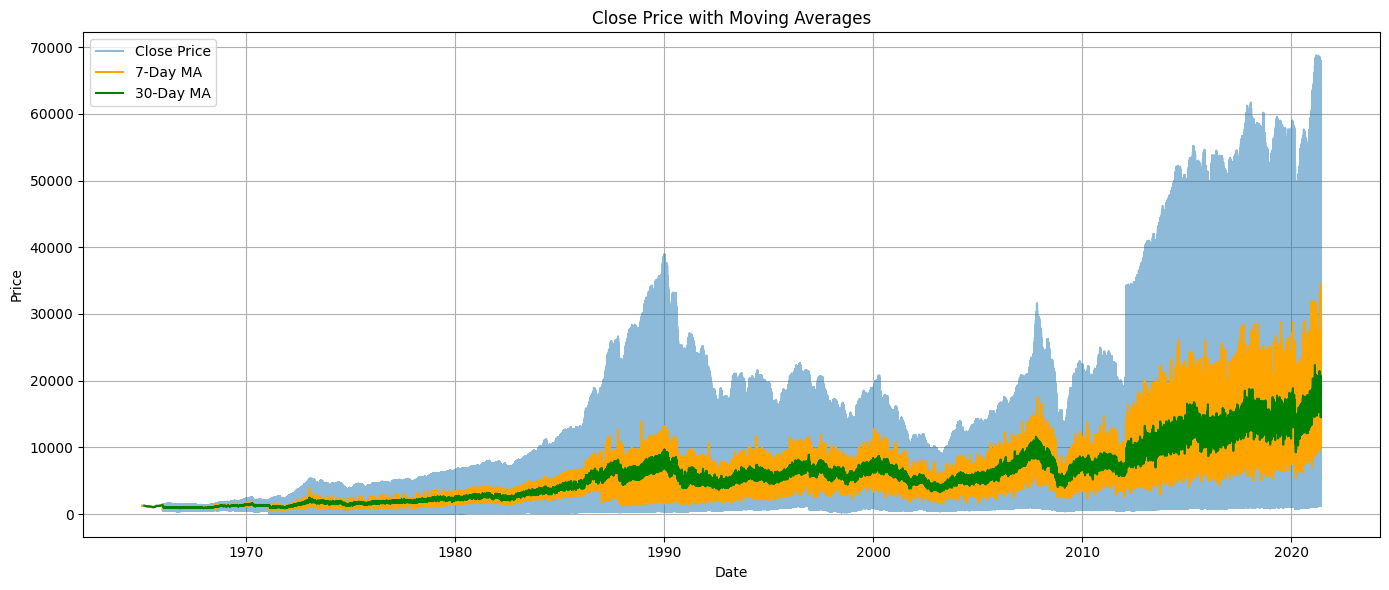

In [29]:
# Plot original Close and moving averages
plt.figure(figsize=(14, 6))
plt.plot(stock_prices_df['Close'], label='Close Price', alpha=0.5)
plt.plot(stock_prices_df['MA_7'], label='7-Day MA', color='orange')
plt.plot(stock_prices_df['MA_30'], label='30-Day MA', color='green')
plt.title('Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Model Training and Forecasting

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:               112457
Model:                 ARIMA(5, 1, 2)   Log Likelihood            -1170800.911
Date:                Fri, 01 Aug 2025   AIC                        2341617.823
Time:                        07:11:13   BIC                        2341694.865
Sample:                             0   HQIC                       2341641.080
                             - 112457                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0119      0.028    -36.279      0.000      -1.067      -0.957
ar.L2         -0.2151      0.006    -39.080      0.000      -0.226      -0.204
ar.L3         -0.2011      0.005    -37.173      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


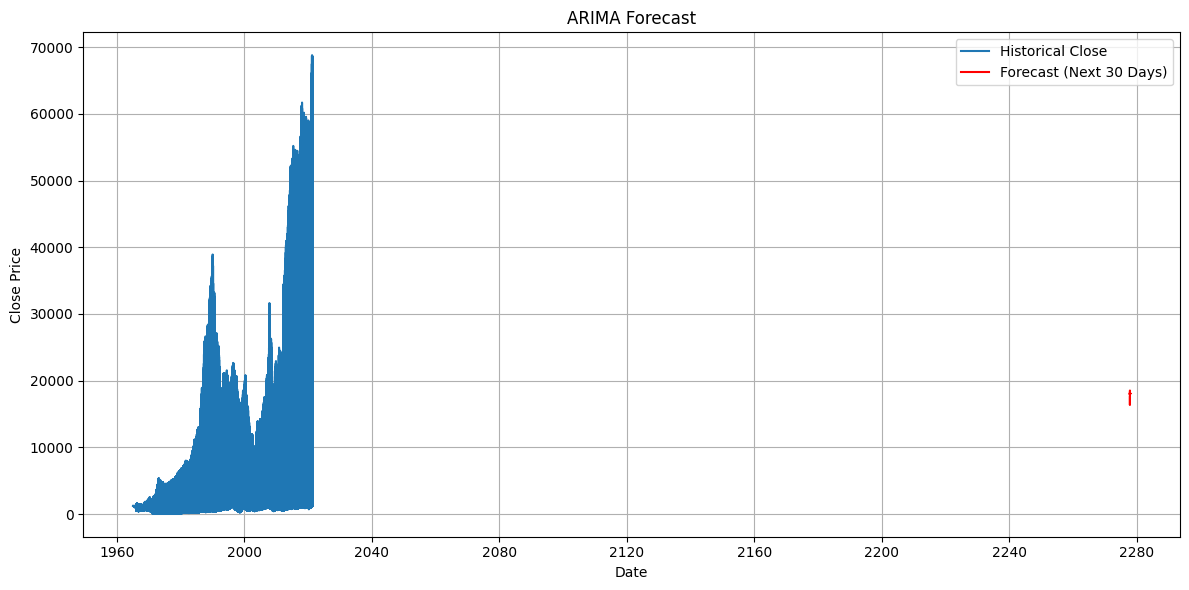

In [30]:
register_matplotlib_converters()

# Fit ARIMA model (p=5, d=1, q=2)
model = ARIMA(stock_prices_df['Close'], order=(5, 1, 2))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)

# Plot historical and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(stock_prices_df['Close'], label='Historical Close')
plt.plot(forecast.index, forecast, label='Forecast (Next 30 Days)', color='red')
plt.title("ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
# Install pmdarima, which is used to tune ARIMA
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.5 MB/s eta 0:00:00


In [34]:
# Current version of NumPy is not compatible with the version of pandas, so uninstall it and install version 1.26.4 (to avoid error). Restart the session, once done.
!pip uninstall numpy
!pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 95.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


Tuning ARIMA (p, d, q) parameters for better accuracy.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2430438.152, Time=2.45 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2397724.482, Time=3.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=84.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2430436.152, Time=1.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2383767.541, Time=4.45 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2375587.638, Time=7.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2369875.874, Time=17.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2365284.328, Time=19.77 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=155.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=101.49 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(0,0,0)[0]             : AIC=2365282.329, Time=15.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,0,0)[0]             : AIC=2369873.875, Time=12.78 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=81.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0]             : AIC=inf, Time=57.81 sec

Best model:  ARIMA(5,1,0)(0,0,0)[0]          
Total fit time: 563.840 seconds
Best ARIMA parameters: (5, 1, 0)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


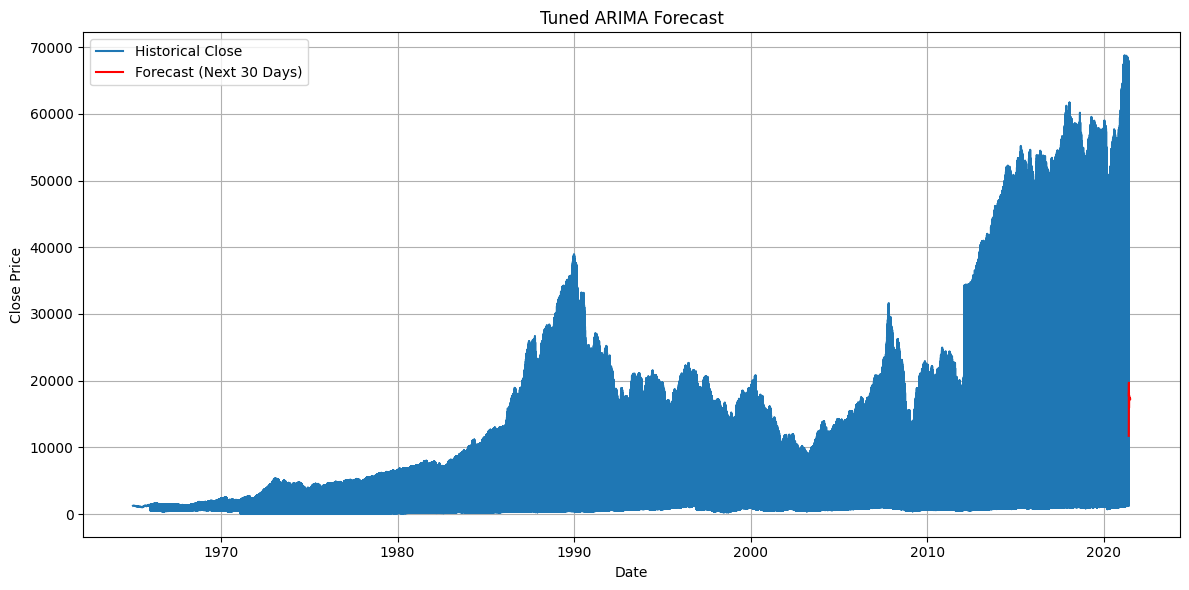

In [31]:
from pmdarima import auto_arima

# Use auto_arima to find optimal (p, d, q)
stepwise_model = auto_arima(
    stock_prices_df['Close'],
    start_p=0, max_p=5,
    start_q=0, max_q=5,
    d=None,           # Automatically determine the order of differencing
    seasonal=False,   # Set to True if data is seasonal
    trace=True,       # Print status of search
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True     # Use stepwise search to reduce computation
)

# Print the best model parameters
print("Best ARIMA parameters:", stepwise_model.order)

# Fit the model with optimal parameters
model = stepwise_model.fit(stock_prices_df['Close'])

# Forecast the next 30 days
forecast = model.predict(n_periods=30)

# Create future date range
future_dates = pd.date_range(stock_prices_df.index[-1] + pd.Timedelta(days=1), periods=30)

# Plot historical and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(stock_prices_df['Close'], label='Historical Close')
plt.plot(future_dates, forecast, label='Forecast (Next 30 Days)', color='red')
plt.title("Tuned ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Model Evaluation

In [36]:
# Split into train/test (last 30 days as test)
train = stock_prices_df['Close'][:-30]
test = stock_prices_df['Close'][-30:]

# Fit ARIMA model on training data (you can use tuned params here)
model = ARIMA(train, order=(5, 1, 0))  # Best (p,d,q) -> (5, 1, 0) got after tuning
model_fit = model.fit()

# Forecast exactly the same length as test set
forecast = model_fit.forecast(steps=len(test))

# Align forecast index to match test
forecast.index = test.index

# Evaluate forecast
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

# Print evaluation
print(f"\nMAE (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}% \n")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



MAE (Mean Absolute Error): 12361.19
RMSE (Root Mean Squared Error): 17966.30
MAPE (Mean Absolute Percentage Error): 144.13% 



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# Model Visualization

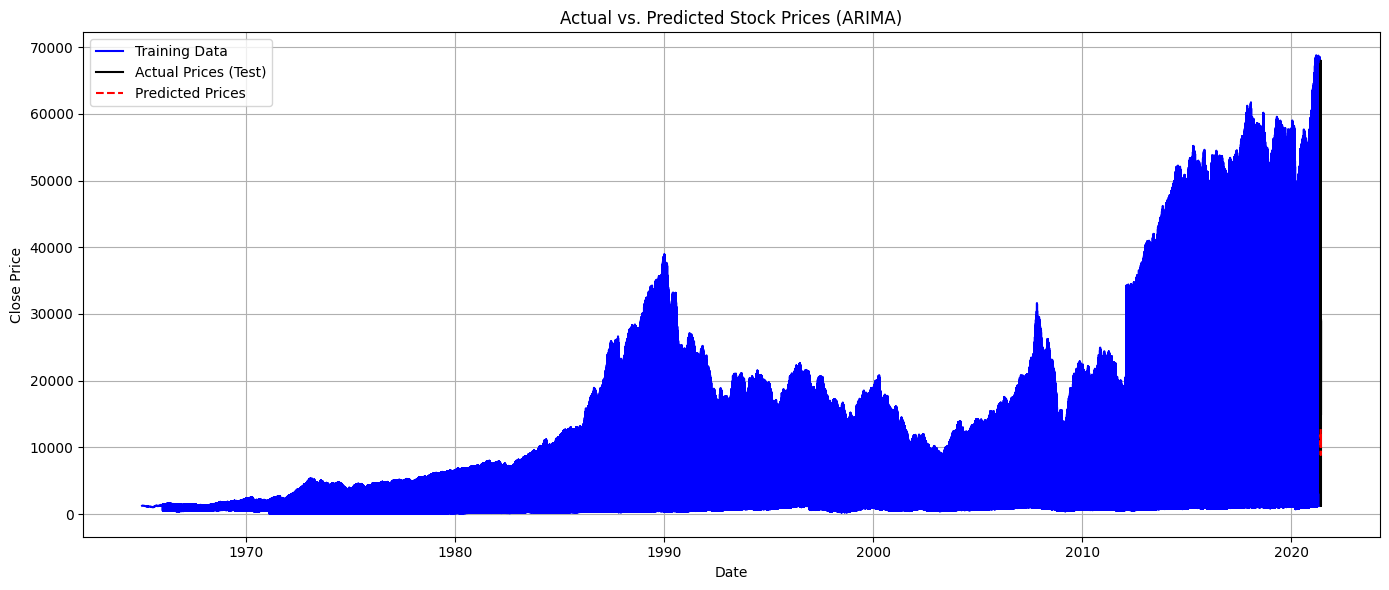

In [37]:
# Plot actual vs. predicted values
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Actual Prices (Test)', color='black')
plt.plot(test.index, forecast, label='Predicted Prices', color='red', linestyle='--')
plt.title('Actual vs. Predicted Stock Prices (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()